In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df= pd.read_csv("combined_dataset.csv")
df.drop(columns=['ranking','isIp','valid'])
df1 = pd.read_csv("All.csv")
labels = ['benign', 'spam']
ndf1 = df1.loc[df1['URL_Type_obf_Type'].isin(labels)]
ndf1['URL_Type_obf_Type'] = ndf1['URL_Type_obf_Type'].map({'benign':1,'spam':2})
ndf1.dropna(inplace=True)

In [37]:
kaggle_df = df
url2016_df= df1
kaggle_df = kaggle_df.sample(frac = 1)

In [3]:
df1

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.500000,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.000000,Defacement
1,0,4,5,5.500000,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.000000,-1.000000,Defacement
2,0,4,5,5.500000,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.000000,-1.000000,Defacement
3,0,4,12,5.500000,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.000000,-1.000000,Defacement
4,0,4,6,5.500000,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.000000,-1.000000,Defacement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,spam
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,spam
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,spam
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,spam


In [4]:
kaggle_df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
44146,2011site-seguro-cielo-fidelidade.com/sorteios/...,10000000,0,0,0,59,0,0,1,36,1,1
51002,paypal.com.us-cgi-bin-webscr-cmd.login.5885d80...,10000000,0,0,0,194,0,0,1,128,7,1
34971,www.creativemac.com/HTM/58Seconds/2000/06_00/s...,536048,0,1,7671,92,0,0,0,19,2,0
12154,www.agdealer.com/parkland,976696,0,1,10591,25,0,0,0,16,2,0
88297,www.gigamonkeys.com/book/,679324,0,1,11322,25,0,0,0,19,2,0


In [5]:

url2016_df= df1
labels = ['benign', 'spam']
url2016_df = url2016_df.loc[url2016_df['URL_Type_obf_Type'].isin(labels)]
url2016_df['URL_Type_obf_Type'] = url2016_df['URL_Type_obf_Type'].map({'benign':1,'spam':2})
url2016_df.dropna(inplace=True)

In [38]:
base_set_data = kaggle_df[0:len(kaggle_df)//3]
good_update_set = kaggle_df[len(kaggle_df)//3:len(kaggle_df)//3+11323]
bad_update_set = kaggle_df[len(kaggle_df)//3+11323:len(kaggle_df)]


In [39]:
bad_update_set['label']=bad_update_set['label'].map({0:1,1:0})

In [8]:
def model(ndf):
    y= ndf['label']
    x=ndf.drop(columns=['domain','label','ranking','isIp','valid'])
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=42)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    return accuracy_score(y_test, predictions)

def update_model(base, new_data):
    ndf = pd.concat([base,new_data])
    y= ndf['label']
    x=ndf.drop(columns=['domain','label','ranking','isIp','valid'])
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=42)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    return accuracy_score(y_test, predictions)

In [40]:
base= model(base_set_data)
good_data= update_model(base_set_data,good_update_set)

df= pd.concat([base_set_data,good_update_set])
model_with_agg= update_model(good_update_set,df)
bad_data= update_model(bad_update_set,base_set_data)

print('Base Model Acc:',base)
print('Good Data1 Model Acc:',good_data)
print('Adding good1 data to base data then test on good2 data: Model Acc:',model_with_agg)
print('Bad_Data Model Acc:',bad_data)

Base Model Acc: 0.813112283345893
Good Data1 Model Acc: 0.8365812917594655
Adding good1 data to base data then test on good2 data: Model Acc: 0.8323373740822947
Bad_Data Model Acc: 0.652300524170064


In [56]:
class Actors:
 
    
    def __init__(self,balance,addr):
        self.weight = 0 #init weights are set to 0
        self.balance = balance #This is the actors init balance
        self.addr = addr
        
        
    def show_weight(self):
        print(self.weight)
    def show_balance(self):
        print(self.balance)
    def get_addr(self):
        return self.addr
    def get_weight(self):
        return(self.weight)
    def get_balance(self):
        return(self.balance)
    def update_weight(self,val):
        self.weight += val
    def update_balance(self,val):
        self.balance += val
    def stake(self,amount):
        self.balance -= amount

    def record(self,data,domain_freq,checkUserData):
        domain_list= list(data['domain'])  
            
        for i in domain_list:
            if i not in domain_freq:
                domain_freq[i] = 0
            else:
                domain_freq[i] += 1
            if self.addr not in checkUserData:
                checkUserData[self.addr] = []
            else:
                checkUserData[self.addr].append(i)

    def simulate(self,base_set,update_set,domain_freq,checkUserData,tag=0):
        balance_list=[]
        prodModel_acc =[]
        prodModel = pd.DataFrame()
        
        for i in range(0,50):
            print(i)
            base = model(base_set)
            
            # if tag ==1:
            #     update = update_set
            # else:
            update = update_set.sample(100)
            
            

            new = update_model(base_set,update)
            
            weight = new - base
            print(weight)
            if weight > 0:# and list(update['domain']) not in list(base_set['domain']):
                prodModel = pd.concat([base_set,update])
                prodModel_acc.append(model(prodModel))
            else:
                prodModel_acc.append(base)
                
            
            for j in list(update['domain']):
                if len(domain_freq) == 0 or len(checkUserData) == 0:
                    break
                if j in domain_freq and weight >0 and domain_freq[j] > 0:
                    print('Initial weight from model:',weight)
                    weight = weight / domain_freq[j]
                    print('Adjusted based domain freq submitted:',weight)
                
                # if (j in checkUserData[self.addr]) and weight > 0:
                   
                #     print('w3',weight)
                #     weight = -weight
                #     print('w4',weight)

            self.record(update,domain_freq,checkUserData)
            self.update_weight(weight)
       
            
            stake = 1
            self.stake(stake)
    
            reward = stake + (stake*weight) 
            
            if weight < 0:

                self.update_balance(-stake)
        

            else:
                self.update_balance(reward)
            
            
            if self.get_balance() < 0:
                balance_list.append(0)
                continue

            self.update_balance(reward)
         
            balance = self.get_balance()
            balance_list.append(balance)
        return balance_list,prodModel,prodModel_acc



Types of bad actors

1. Giving wrong data on purpose (flip labels) - will always decrease accuracy and they lose stake 

2. Repeat giving the same data point (that you know increases accuracy) - need some way to check for same data from same user
3. Collborating by giving the same data point (that you know increases accuracy) as someone else - ???

4. Giving hardcoded data based on other data that increase acc

In [57]:
domain_freq= dict()
checkUserData = dict()

In [58]:
good = Actors(10,1)
bad_flipped= Actors(10,2)
bad_same_data= Actors(10,3)


good_balance,prodModel,prodModel_acc = good.simulate(base_set_data,good_update_set,domain_freq,checkUserData)


0
0.006486825785510075
1
0.009456387775116593
2
0.00797160678031339
3
0.004259654293305215
4
0.01019877827251825
5
0.007229216282911732
6
0.006486825785510075
7
0.008713997277714935
8
0.008713997277714935
9
0.00797160678031339
10
0.006486825785510075
11
0.007229216282911732
Initial weight from model: 0.007229216282911732
Adjusted based domain freq submitted: 0.007229216282911732
12
0.010941168769919907
Initial weight from model: 0.010941168769919907
Adjusted based domain freq submitted: 0.010941168769919907
Initial weight from model: 0.010941168769919907
Adjusted based domain freq submitted: 0.010941168769919907
13
0.00797160678031339
Initial weight from model: 0.00797160678031339
Adjusted based domain freq submitted: 0.00797160678031339
14
0.007229216282911732
Initial weight from model: 0.007229216282911732
Adjusted based domain freq submitted: 0.007229216282911732
Initial weight from model: 0.007229216282911732
Adjusted based domain freq submitted: 0.007229216282911732
15
0.008713997

In [59]:
bad_balance,prodModel_bad,prodModel_acc_bad = bad_flipped.simulate(base_set_data,bad_update_set,domain_freq,checkUserData)

0
-0.004649031675514448
1
-0.006133812670317651
2
-0.005391422172915994
3
-0.007618593665120965
4
-0.0031642506807111337
5
-0.004649031675514448
6
-0.005391422172915994
7
-0.003906641178112791
8
-0.0031642506807111337
9
-0.006133812670317651
10
-0.006876203167719308
11
-0.004649031675514448
12
-0.0031642506807111337
13
-0.005391422172915994
14
-0.006133812670317651
15
-0.0031642506807111337
16
-0.005391422172915994
17
-0.004649031675514448
18
-0.005391422172915994
19
-0.005391422172915994
20
-0.003906641178112791
21
-0.004649031675514448
22
-0.007618593665120965
23
-0.003906641178112791
24
-0.0024218601833094766
25
-0.007618593665120965
26
-0.004649031675514448
27
-0.003906641178112791
28
-0.0009370791885062735
29
-0.004649031675514448
30
-0.006133812670317651
31
-0.0031642506807111337
32
-0.005391422172915994
33
-0.003906641178112791
34
-0.006133812670317651
35
-0.0016794696859079306
36
-0.004649031675514448
37
-0.0024218601833094766
38
-0.0031642506807111337
39
-0.003906641178112791


In [ ]:
prodModel_acc = list(np.array(prodModel_acc) * 100)
good_balance_perc = list((np.array(good_balance) / 10) *100)
bad_balance_perc = list((np.array(bad_balance) / 10) *100)

In [45]:
good_balance.insert(0,10)

In [50]:
bad_balance.insert(0,10)

In [54]:
len(good_balance)

51

In [ ]:
len(prodModel_acc)

50

Text(0.5, 1.0, 'Simulated Accuracy')

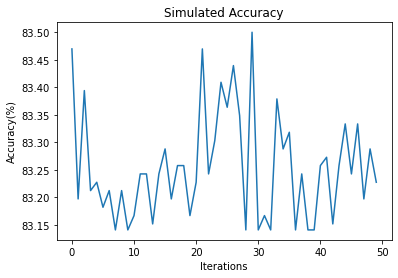

In [ ]:
plt.plot(prodModel_acc)
plt.xlabel('Iterations')
plt.ylabel('Accuracy(%)')
plt.title('Simulated Accuracy')


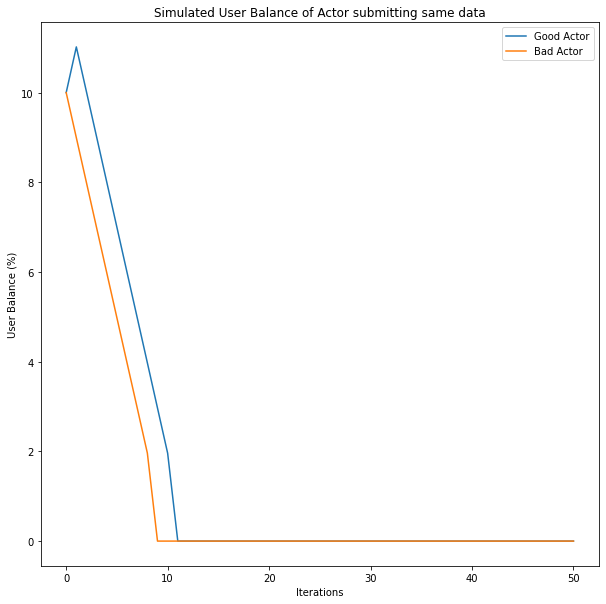

In [55]:
import matplotlib.pyplot as plt
x= [i for i in range(0,51)]
plt.figure(figsize=(10,10))
plt.plot(x,good_balance,label='Good Actor')
plt.plot(x,bad_balance, label='Bad Actor')
#plt.plot(x,prodModel_acc, label='Model Acc')
plt.xlabel('Iterations')
plt.ylabel('User Balance (%)')
plt.title('Simulated User Balance of Actor submitting same data')
plt.legend()

In [ ]:
prodModel_acc

[83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.77312708522899,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.77312708522899,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458,
 83.75039099155458]

In [ ]:

prodModel_acc[-1]

83.75039099155458

# Testing

In [ ]:
domain_freq= dict()
domain_list= list(good_update_set['domain'])

In [ ]:
for i in domain_list:
    if i not in domain_freq:
        domain_freq[i] = 0
    else:
        domain_freq[i] +=1

In [ ]:
domain_freq

{'www.cliki.net/PLisp': 0,
 'fun-dive.com/gps/?check=1i43550227.html': 0,
 'nordico-avac.com/as/': 0,
 'www.dataweb.de/en/products/delphi_database.html': 0,
 'home.neopets.com/templates/homepage.phtml?pet_name=Solarbeam2000': 0,
 'www.gamesware.ro/wp-content/plugins/autoblogged/img/tes.php': 0,
 'cinephilia.gr/search/cadastro2/': 0,
 'www.nvo.com/sts_consultants': 0,
 'research.microsoft.com/conferences/dbpl05/': 0,
 'stonepinehillestate.com/directory/index.html': 0,
 'www.hongchityre.com/hongchi/login.htm?us.battle.net/login/en/?ref=http\\%3A\\%2F\\%2Fpjcbaauus.battle.net\\%2Fd3\\%2Fen\\%2Findex&app=com-d3': 0,
 'paypal--confirmation.it.allprojectors.co.nz/confirmation/': 0,
 'ajstas.org.au/wp-content/hongleong/index.htm': 0,
 'dynamicabilityinstitute.com/wp-includes/js/imgareaselect/kong/WWW/paypal/update-accont/Help.suc/us/webscr.htm?cmd=_login-run&dispatch=5885d80a13c0db1f998ca054efbdf2c29878a435fe324eec2511727fbf3e9efcd8': 0,
 'www.airjordanpalace.com/wp-includes/personal/logon/lo

In [ ]:
good = Actors(10,123)

In [ ]:
addr= good.get_addr()

In [ ]:
checkUserData = dict()

In [ ]:
checkUserData[addr]=[]

In [ ]:
checkUserData

{123: []}

In [ ]:
for i in domain_list:
    checkUserData[addr].append(i)

In [ ]:
if 'biphome.spray.se/urbansan/gen_paus/' in checkUserData[addr]:
    print(1)